# Dimensionality Reduction

There are two main approaches for dimensionality reduction **Projection** and **Manifold Learning**.

### Manifold Learning

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

%matplotlib inline

from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

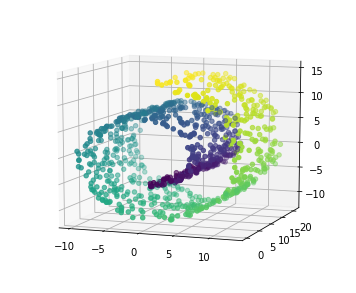

In [11]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=t)
ax.view_init(10, -70)

### Principal component analysis

PCA minimises the mean squared distance between the original dataset and its projection onto that axis.

Principal components matrix:

$$ V^T = \begin{pmatrix} | & | &  & |\\ c_1 & c_2 & \cdots & c_n \\ | & | & & |& \end{pmatrix} $$

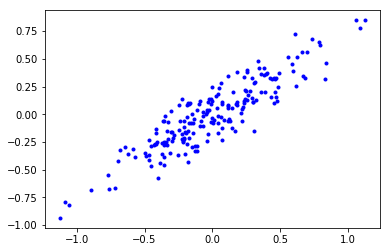

In [15]:
import numpy as np

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

plt.plot(X[:,0], X[:,1], 'b.')

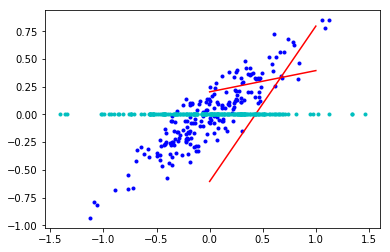

In [36]:
# calculate the principal components using the numpy's svd function

X_centered = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:,0]+1
c2 = V.T[:,1]

W2 = V.T[:, :2]
X2D = X_centered.dot(W2)

# I can't make sense of the PCA vectors :(
plt.plot(X_centered[:,0], X_centered[:,1], 'b.')
plt.plot(c2, 'r-')
plt.plot(c1, 'r-')
plt.plot(X2D[:,0],np.zeros(X2D[:,0].shape), 'c.')

0.953698638306 [-0.79644131 -0.60471583]
0.0463013616941 [ 0.60471583 -0.79644131]


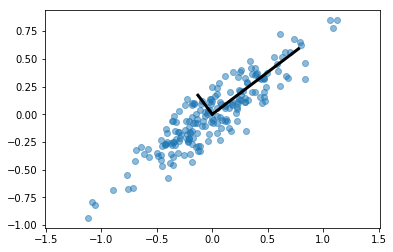

In [45]:
# With sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit(X)

plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * -1 * np.sqrt(length)
    print(length, vector)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');